In [61]:
# import libraries
import pandas as pd 
import numpy as np 
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report, f1_score
import warnings
warnings.filterwarnings('ignore')

In [62]:
star_data = pd.read_csv("star_classification.csv")

In [63]:
star_data.head()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842


In [64]:
star_data.columns

Index(['obj_ID', 'alpha', 'delta', 'u', 'g', 'r', 'i', 'z', 'run_ID',
       'rerun_ID', 'cam_col', 'field_ID', 'spec_obj_ID', 'class', 'redshift',
       'plate', 'MJD', 'fiber_ID'],
      dtype='object')

In [65]:
star_data.shape

(100000, 18)

In [66]:
star_data.describe()


,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID
count,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.0,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.237665e+18,177.629117,24.135305,21.980468,20.531387,19.645762,19.084854,18.668810,4481.366060,301.0,3.511610,186.130520,5.783882e+18,0.576661,5137.009660,55588.647500,449.312740
std,8.438560e+12,96.502241,19.644665,31.769291,31.750292,1.854760,1.757895,31.728152,1964.764593,0.0,1.586912,149.011073,3.324016e+18,0.730707,2952.303351,1808.484233,272.498404
min,1.237646e+18,0.005528,-18.785328,-9999.000000,-9999.000000,9.822070,9.469903,-9999.000000,109.000000,301.0,1.000000,11.000000,2.995191e+17,-0.009971,266.000000,51608.000000,1.000000
25%,1.237659e+18,127.518222,5.146771,20.352353,18.965230,18.135828,17.732285,17.460677,3187.000000,301.0,2.000000,82.000000,2.844138e+18,0.054517,2526.000000,54234.000000,221.000000
50%,1.237663e+18,180.900700,23.645922,22.179135,21.099835,20.125290,19.405145,19.004595,4188.000000,301.0,4.000000,146.000000,5.614883e+18,0.424173,4987.000000,55868.500000,433.000000
75%,1.237668e+18,233.895005,39.901550,23.687440,22.123767,21.044785,20.396495,19.921120,5326.000000,301.0,5.000000,241.000000,8.332144e+18,0.704154,7400.250000,56777.000000,645.000000
max,1.237681e+18,359.999810,83.000519,32.781390,31.602240,29.571860,32.141470,29.383740,8162.000000,301.0,6.000000,989.000000,1.412694e+19,7.011245,12547.000000,58932.000000,1000.000000


In [67]:
star_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   obj_ID       100000 non-null  float64
 1   alpha        100000 non-null  float64
 2   delta        100000 non-null  float64
 3   u            100000 non-null  float64
 4   g            100000 non-null  float64
 5   r            100000 non-null  float64
 6   i            100000 non-null  float64
 7   z            100000 non-null  float64
 8   run_ID       100000 non-null  int64  
 9   rerun_ID     100000 non-null  int64  
 10  cam_col      100000 non-null  int64  
 11  field_ID     100000 non-null  int64  
 12  spec_obj_ID  100000 non-null  float64
 13  class        100000 non-null  object 
 14  redshift     100000 non-null  float64
 15  plate        100000 non-null  int64  
 16  MJD          100000 non-null  int64  
 17  fiber_ID     100000 non-null  int64  
dtypes: float64(10), int64(7),

In [14]:
##Check missing values and handle them##

In [68]:
star_data.isnull().sum()


obj_ID         0
alpha          0
delta          0
u              0
g              0
r              0
i              0
z              0
run_ID         0
rerun_ID       0
cam_col        0
field_ID       0
spec_obj_ID    0
class          0
redshift       0
plate          0
MJD            0
fiber_ID       0
dtype: int64

In [69]:
columns = ['obj_ID', 'run_ID', 'rerun_ID', 'field_ID', 'spec_obj_ID', 'fiber_ID']

# Loop through the column names and calculate unique values for each
for col in columns:
    unique_count = star_data[col].nunique()
    print(f"The unique values in {col} are {unique_count}")
    

The unique values in obj_ID are 78053
The unique values in run_ID are 430
The unique values in rerun_ID are 1
The unique values in field_ID are 856
The unique values in spec_obj_ID are 100000
The unique values in fiber_ID are 1000


In [70]:
star_data.drop(columns= columns, axis= 1, inplace= True)


In [71]:
star_data.head()

,alpha,delta,u,g,r,i,z,cam_col,class,redshift,plate,MJD
0,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,2,GALAXY,0.634794,5812,56354
1,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,5,GALAXY,0.779136,10445,58158
2,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,2,GALAXY,0.644195,4576,55592
3,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,3,GALAXY,0.932346,9149,58039
4,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,3,GALAXY,0.116123,6121,56187


In [72]:
star_data.columns


Index(['alpha', 'delta', 'u', 'g', 'r', 'i', 'z', 'cam_col', 'class',
       'redshift', 'plate', 'MJD'],
      dtype='object')

In [73]:
star_data['cam_col'].unique()

array([2, 5, 3, 4, 6, 1])

Taking out 5 records from data set to check performance in the deployed model

In [74]:
sample_data = star_data.sample(n = 5, random_state=47)

sample_data.to_csv("datacheck.csv", index = False)

star_data.drop(sample_data.index)

star_data.head()


,alpha,delta,u,g,r,i,z,cam_col,class,redshift,plate,MJD
0,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,2,GALAXY,0.634794,5812,56354
1,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,5,GALAXY,0.779136,10445,58158
2,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,2,GALAXY,0.644195,4576,55592
3,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,3,GALAXY,0.932346,9149,58039
4,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,3,GALAXY,0.116123,6121,56187


In [75]:
sample_data

,alpha,delta,u,g,r,i,z,cam_col,class,redshift,plate,MJD
93899,5.594267,0.139084,22.03138,21.03268,20.07739,19.64677,19.37896,4,GALAXY,0.288054,4219,55480
66968,15.173133,-6.363763,25.98026,22.76439,20.84574,19.72769,19.06375,6,GALAXY,0.548455,7156,56959
82817,127.270683,19.672462,23.14354,21.76209,19.95079,19.13606,18.57599,5,GALAXY,0.372808,4483,55587
23556,38.325890,-3.766826,21.46732,20.73737,20.75849,20.75842,20.56014,4,STAR,-0.000533,4386,55540
61885,39.724400,-0.587740,21.08614,20.65918,19.92450,19.51583,19.30347,2,GALAXY,0.455118,1070,52591


EDA

In [76]:
data = star_data.drop(columns='class', axis= 1)
data.head()

,alpha,delta,u,g,r,i,z,cam_col,redshift,plate,MJD
0,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,2,0.634794,5812,56354
1,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,5,0.779136,10445,58158
2,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,2,0.644195,4576,55592
3,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,3,0.932346,9149,58039
4,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,3,0.116123,6121,56187


Data Normalisation

In [77]:
scaler = MinMaxScaler()
data = scaler.fit_transform(data)

In [78]:
data

array([[0.37690482, 0.50380246, 0.99911256, ..., 0.09183086, 0.45159189,
        0.64800655],
       [0.40228576, 0.49181212, 0.99920216, ..., 0.11238889, 0.8288413 ,
        0.89432004],
       [0.39495978, 0.53413882, 0.99925055, ..., 0.09316979, 0.35094862,
        0.54396505],
       ...,
       [0.62384846, 0.33880973, 0.99884246, ..., 0.02183899, 0.20340363,
        0.399645  ],
       [0.58962907, 0.6429744 , 0.99925925, ..., 0.06622931, 0.52805146,
        0.64991808],
       [0.54692681, 0.67052516, 0.99898725, ..., 0.07874916, 0.58171159,
        0.75040961]], shape=(100000, 11))

In [79]:
data = pd.DataFrame(data= data, columns= ['alpha', 'delta', 'u', 'g', 'r', 'i', 'z', 'cam_col', 
       'redshift', 'plate', 'MJD'])

In [80]:
data.head()

,alpha,delta,u,g,r,i,z,cam_col,redshift,plate,MJD
0,0.376905,0.503802,0.999113,0.999070,0.535344,0.427665,0.998944,0.2,0.091831,0.451592,0.648007
1,0.402286,0.491812,0.999202,0.999126,0.646203,0.515986,0.999225,0.8,0.112389,0.828841,0.894320
2,0.394960,0.534139,0.999251,0.999109,0.546218,0.435729,0.998959,0.2,0.093170,0.350949,0.543965
3,0.940947,0.180600,0.998939,0.999220,0.596946,0.486717,0.998990,0.4,0.134210,0.723312,0.878072
4,0.959118,0.392679,0.998670,0.998602,0.337999,0.287021,0.998620,0.4,0.017959,0.476753,0.625205


In [81]:
data['class'] = star_data['class']

In [82]:

data.head()


,alpha,delta,u,g,r,i,z,cam_col,redshift,plate,MJD,class
0,0.376905,0.503802,0.999113,0.999070,0.535344,0.427665,0.998944,0.2,0.091831,0.451592,0.648007,GALAXY
1,0.402286,0.491812,0.999202,0.999126,0.646203,0.515986,0.999225,0.8,0.112389,0.828841,0.894320,GALAXY
2,0.394960,0.534139,0.999251,0.999109,0.546218,0.435729,0.998959,0.2,0.093170,0.350949,0.543965,GALAXY
3,0.940947,0.180600,0.998939,0.999220,0.596946,0.486717,0.998990,0.4,0.134210,0.723312,0.878072,GALAXY
4,0.959118,0.392679,0.998670,0.998602,0.337999,0.287021,0.998620,0.4,0.017959,0.476753,0.625205,GALAXY


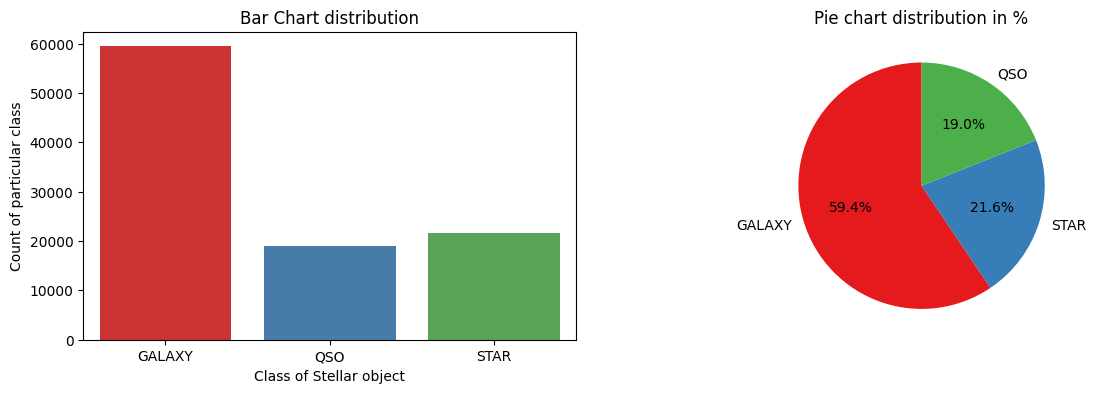

In [83]:
    plt.figure(figsize= (14,4))

plt.subplot(1,2,1)
palette_colors = sns.color_palette("Set1")
ax = sns.countplot(data= data, x= 'class', palette= palette_colors)
plt.xlabel("Class of Stellar object")
plt.ylabel("Count of particular class")
plt.title("Bar Chart distribution")


plt.subplot(1,2,2)
distribution = data['class'].value_counts()
plt.pie(x=distribution, labels= distribution.index, autopct= '%1.1f%%', startangle=90, colors= sns.color_palette('Set1') )
plt.title("Pie chart distribution in %")
plt.show()

Encoding  the Class Variable

In [84]:
data['class'] = data['class'].map({'GALAXY': 0, 'STAR': 1, 'QSO': 2})
data.head()

,alpha,delta,u,g,r,i,z,cam_col,redshift,plate,MJD,class
0,0.376905,0.503802,0.999113,0.999070,0.535344,0.427665,0.998944,0.2,0.091831,0.451592,0.648007,0
1,0.402286,0.491812,0.999202,0.999126,0.646203,0.515986,0.999225,0.8,0.112389,0.828841,0.894320,0
2,0.394960,0.534139,0.999251,0.999109,0.546218,0.435729,0.998959,0.2,0.093170,0.350949,0.543965,0
3,0.940947,0.180600,0.998939,0.999220,0.596946,0.486717,0.998990,0.4,0.134210,0.723312,0.878072,0
4,0.959118,0.392679,0.998670,0.998602,0.337999,0.287021,0.998620,0.4,0.017959,0.476753,0.625205,0


Outlier Analysis

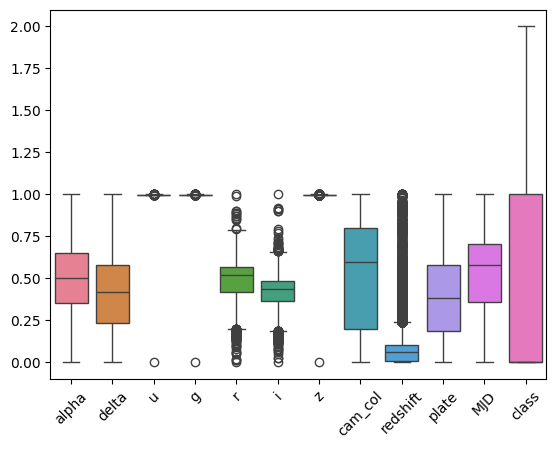

In [85]:
sns.boxplot(data=data)
plt.xticks(rotation=45)
plt.show()

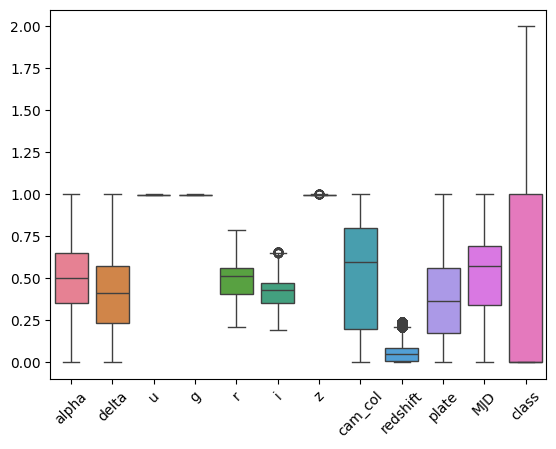

In [86]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    # Filter out the outliers
    filtered_df = df[(df[column] >= lower) & (df[column] <= upper)]
    return filtered_df

# Create a copy of the data
data_clean = data.copy()

# Remove outliers for each numeric column
for col in data_clean.select_dtypes(include='number').columns:
    data_clean = remove_outliers(data_clean, col)

# Plot the boxplot with outliers removed
sns.boxplot(data=data_clean)
plt.xticks(rotation=45)
plt.show()

In [87]:
# Let us now check the percent of ouliers compared to data with outlier
removed_percent = ((data.shape[0] - data_clean.shape[0]) / data.shape[0]) * 100
print(f'Percentage of outliers removed from the data set is {removed_percent}%')

Percentage of outliers removed from the data set is 9.4%


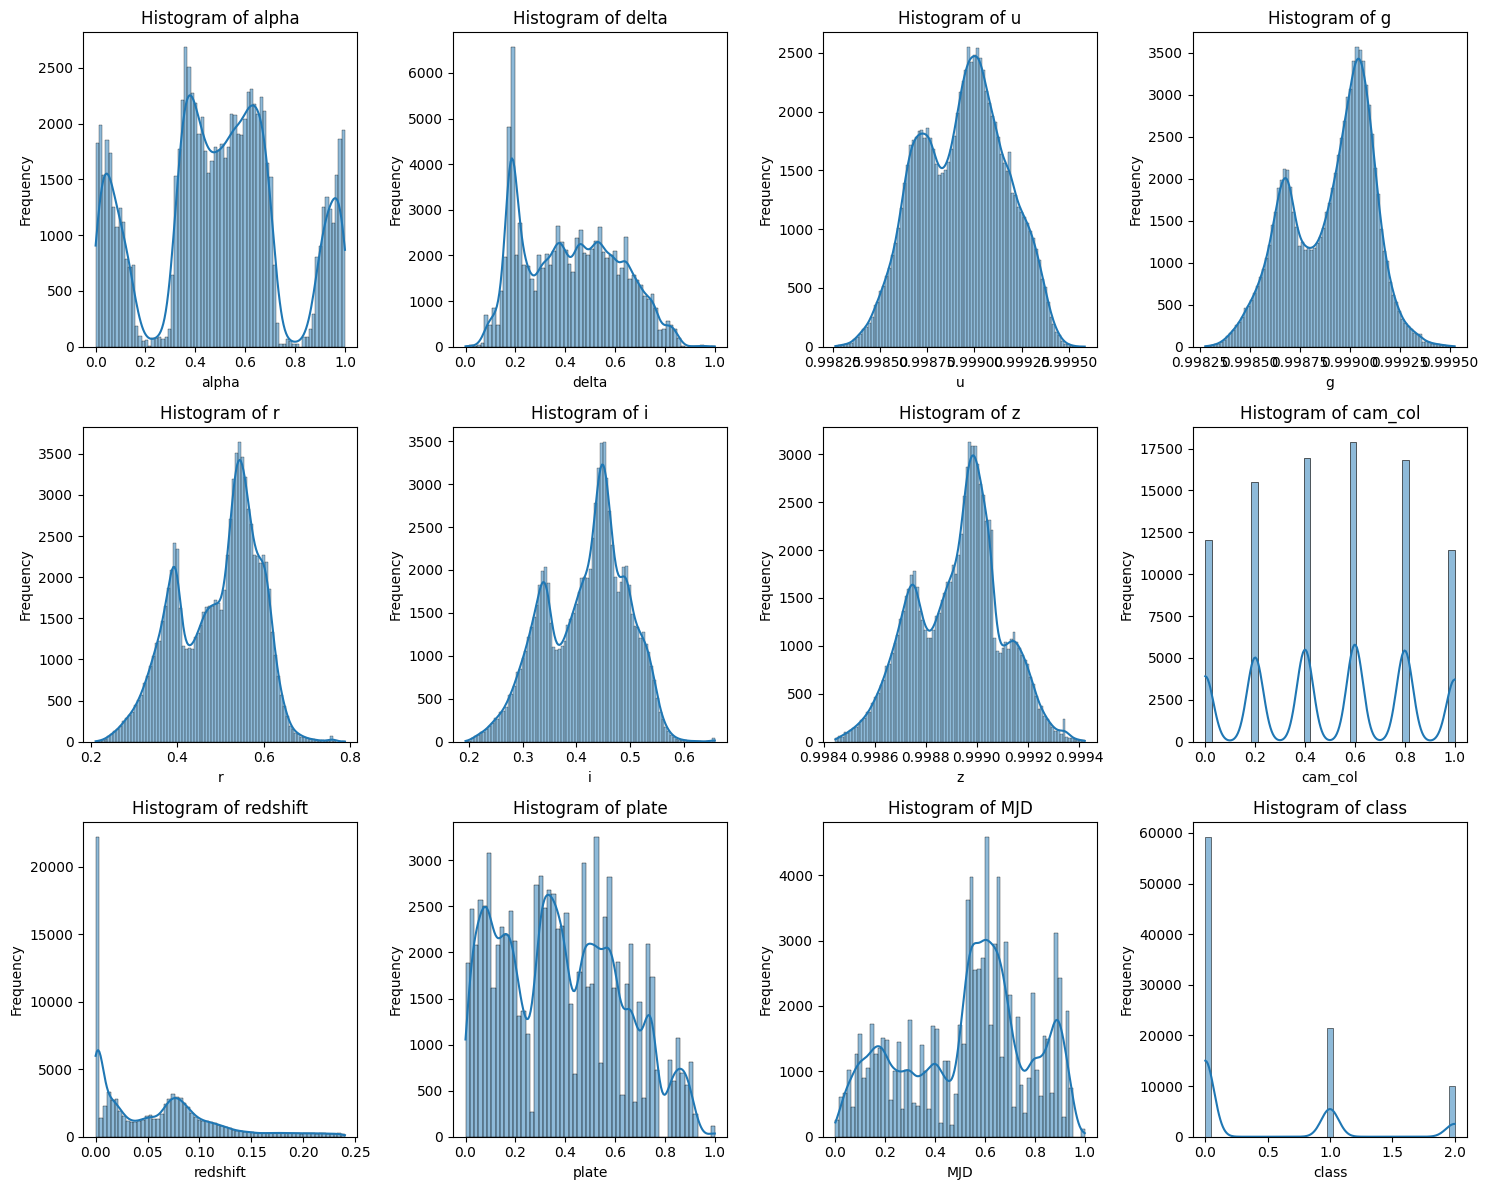

In [88]:
import math

# Select numeric columns from the dataset
numeric_columns = data_clean.select_dtypes(include='number').columns

# Calculate the number of rows needed based on the number of columns
n_cols = 4
n_rows = math.ceil(len(numeric_columns) / n_cols)

# Set up the subplot grid with 3 columns
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, n_rows * 4))

# Flatten axes in case it's a 2D array
axes = axes.flatten()

# Create a histogram for each numeric column
for i, col in enumerate(numeric_columns):
    sns.histplot(data_clean[col], ax=axes[i], kde=True)  # Plot with KDE curve
    axes[i].set_title(f'Histogram of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

# Remove empty subplots, if any
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()


In [89]:
data_clean.head()

,alpha,delta,u,g,r,i,z,cam_col,redshift,plate,MJD,class
0,0.376905,0.503802,0.999113,0.999070,0.535344,0.427665,0.998944,0.2,0.091831,0.451592,0.648007,0
1,0.402286,0.491812,0.999202,0.999126,0.646203,0.515986,0.999225,0.8,0.112389,0.828841,0.894320,0
2,0.394960,0.534139,0.999251,0.999109,0.546218,0.435729,0.998959,0.2,0.093170,0.350949,0.543965,0
3,0.940947,0.180600,0.998939,0.999220,0.596946,0.486717,0.998990,0.4,0.134210,0.723312,0.878072,0
4,0.959118,0.392679,0.998670,0.998602,0.337999,0.287021,0.998620,0.4,0.017959,0.476753,0.625205,0


Correalation

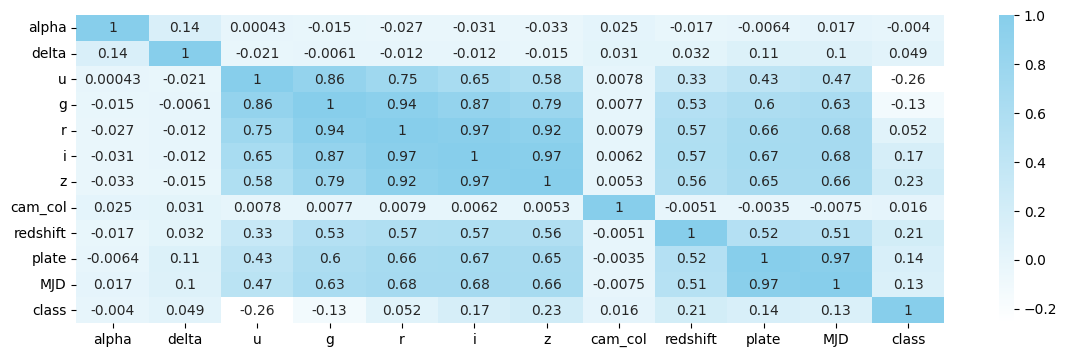

In [90]:
from matplotlib.colors import LinearSegmentedColormap

correl = data_clean.corr()

plt.figure(figsize= (14,4))

# Define a custom single-color colormap
single_color_cmap = LinearSegmentedColormap.from_list("single_color", ["white", "skyblue"])

# Plot the heatmap with the custom colormap
sns.heatmap(correl, cmap=single_color_cmap, annot=True)
plt.show()

Splitting the Dataset

In [91]:
X = data_clean.drop('class', axis = 1)
y = data_clean['class']
X.head()

,alpha,delta,u,g,r,i,z,cam_col,redshift,plate,MJD
0,0.376905,0.503802,0.999113,0.999070,0.535344,0.427665,0.998944,0.2,0.091831,0.451592,0.648007
1,0.402286,0.491812,0.999202,0.999126,0.646203,0.515986,0.999225,0.8,0.112389,0.828841,0.894320
2,0.394960,0.534139,0.999251,0.999109,0.546218,0.435729,0.998959,0.2,0.093170,0.350949,0.543965
3,0.940947,0.180600,0.998939,0.999220,0.596946,0.486717,0.998990,0.4,0.134210,0.723312,0.878072
4,0.959118,0.392679,0.998670,0.998602,0.337999,0.287021,0.998620,0.4,0.017959,0.476753,0.625205


In [92]:
y[0:10]

0    0
1    0
2    0
3    0
4    0
5    2
6    2
7    0
8    0
9    1
Name: class, dtype: int64

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25, random_state= 42)
X_train.shape, y_train.shape

((67950, 11), (67950,))

Model Development 
1. Decision Tree
2. Random Forest
3. K Nearest Neighbors (KNN)
4. Support Vector Machines (SVM)
5. Gradient Boosting
6. AdaBoost
7. XGBoost

Decision Tree Classifier 

In [100]:
model_DT = DecisionTreeClassifier()
model_DT.fit(X_train,y_train)
y_pred_DT = model_DT.predict(X_test)

In [95]:
# Decision Tree Evaluation
accuracy_DT = accuracy_score(y_test, y_pred_DT)

# Weighted precision and recall (due to class imbalance)
precision_DT = precision_score(y_test, y_pred_DT, average='weighted')
recall_DT = recall_score(y_test, y_pred_DT, average='weighted')

# Class-wise precision and recall
precision_DT_class = precision_score(y_test, y_pred_DT, average=None)  
recall_DT_class = recall_score(y_test, y_pred_DT, average=None)

f1_DT = f1_score(y_test, y_pred_DT, average= 'weighted')
confusion_DT = confusion_matrix(y_test, y_pred_DT)
classi_DT = classification_report(y_test, y_pred_DT)

# Print weighted metrics
print(f"The Accuracy score for Decision Tree Classifier is {accuracy_DT:.2f}")
print(f"The Weighted Precision score for Decision Tree Classifier is {precision_DT:.2f}")
print(f"The Weighted Recall score for Decision Tree Classifier is {recall_DT:.2f}")

# Print confusion matrix, classification report and f1_score
print(f"The F1 score for Decision Tree Classifier is {f1_DT:.4f}")
print(f"The Confusion Matrix for Decision Tree Classifier is \n{confusion_DT}")
print(f"The Classification Report for Decision Tree Classifier is \n{classi_DT}")

# Print class-wise precision and recall
print("\nClass-wise Precision and Recall:")
for idx, class_value in enumerate(set(y_test)):
    print(f"Class {class_value} - Precision: {precision_DT_class[idx]:.2f}, Recall: {recall_DT_class[idx]:.2f}")

The Accuracy score for Decision Tree Classifier is 0.96
The Weighted Precision score for Decision Tree Classifier is 0.96
The Weighted Recall score for Decision Tree Classifier is 0.96
The F1 score for Decision Tree Classifier is 0.9594
The Confusion Matrix for Decision Tree Classifier is 
[[14394    20   463]
 [   23  5241     1]
 [  415     1  2092]]
The Classification Report for Decision Tree Classifier is 
              precision    recall  f1-score   support

           0       0.97      0.97      0.97     14877
           1       1.00      1.00      1.00      5265
           2       0.82      0.83      0.83      2508

    accuracy                           0.96     22650
   macro avg       0.93      0.93      0.93     22650
weighted avg       0.96      0.96      0.96     22650


Class-wise Precision and Recall:
Class 0 - Precision: 0.97, Recall: 0.97
Class 1 - Precision: 1.00, Recall: 1.00
Class 2 - Precision: 0.82, Recall: 0.83


Random Forest Classifier 

In [96]:
model_RF = RandomForestClassifier()
model_RF.fit(X_train,y_train)
y_pred_RF = model_DT.predict(X_test)

In [97]:
# Random Forest Evaluation
accuracy_RF = accuracy_score(y_test, y_pred_RF)

# Weighted precision and recall (due to class imbalance)
precision_RF = precision_score(y_test, y_pred_RF, average='weighted')
recall_RF = recall_score(y_test, y_pred_RF, average='weighted')

# Class-wise precision and recall
precision_RF_class = precision_score(y_test, y_pred_RF, average=None)  
recall_RF_class = recall_score(y_test, y_pred_RF, average=None)

f1_RF = f1_score(y_test, y_pred_RF, average='weighted')
confusion_RF = confusion_matrix(y_test, y_pred_RF)
classi_RF = classification_report(y_test, y_pred_RF)

# Print weighted metrics
print(f"The Accuracy score for Random Forest Classifier is {accuracy_RF:.2f}")
print(f"The Weighted Precision score for Random Forest Classifier is {precision_RF:.2f}")
print(f"The Weighted Recall score for Random Forest Classifier is {recall_RF:.2f}")

# Print f1_score, confusion matrix and classification report
print(f"The F1 score for Random Forest Classifier is {f1_RF:.4f}")
print(f"The Confusion Matrix for Random Forest Classifier is \n{confusion_RF}")
print(f"The Classification Report for Random Forest Classifier is \n{classi_RF}")

# Print class-wise precision and recall
print("\nClass-wise Precision and Recall:")
for idx, class_value in enumerate(set(y_test)):
    print(f"Class {class_value} - Precision: {precision_RF_class[idx]:.2f}, Recall: {recall_RF_class[idx]:.2f}")

The Accuracy score for Random Forest Classifier is 0.96
The Weighted Precision score for Random Forest Classifier is 0.96
The Weighted Recall score for Random Forest Classifier is 0.96
The F1 score for Random Forest Classifier is 0.9594
The Confusion Matrix for Random Forest Classifier is 
[[14394    20   463]
 [   23  5241     1]
 [  415     1  2092]]
The Classification Report for Random Forest Classifier is 
              precision    recall  f1-score   support

           0       0.97      0.97      0.97     14877
           1       1.00      1.00      1.00      5265
           2       0.82      0.83      0.83      2508

    accuracy                           0.96     22650
   macro avg       0.93      0.93      0.93     22650
weighted avg       0.96      0.96      0.96     22650


Class-wise Precision and Recall:
Class 0 - Precision: 0.97, Recall: 0.97
Class 1 - Precision: 1.00, Recall: 1.00
Class 2 - Precision: 0.82, Recall: 0.83


K - Nearest Neighbour

In [98]:
model_knn = KNeighborsClassifier()
model_knn.fit(X_train, y_train)
y_pred_knn = model_knn.predict(X_test)

In [99]:
# KNN Evaluation
accuracy_knn = accuracy_score(y_test, y_pred_knn)

# Weighted precision and recall for overall performance (handles class imbalance)
precision_knn = precision_score(y_test, y_pred_knn, average='weighted')
recall_knn = recall_score(y_test, y_pred_knn, average='weighted')

# Class-wise precision and recall
precision_knn_class = precision_score(y_test, y_pred_knn, average=None)
recall_knn_class = recall_score(y_test, y_pred_knn, average=None)

f1_knn = f1_score(y_test, y_pred_knn, average='weighted')
confusion_knn = confusion_matrix(y_test, y_pred_knn)
classi_knn = classification_report(y_test, y_pred_knn)

# Print weighted metrics
print(f"The Accuracy score for K Nearest Neighbours Classifier is {accuracy_knn:.2f}")
print(f"The Weighted Precision score for K Nearest Neighbours Classifier is {precision_knn:.2f}")
print(f"The Weighted Recall score for K Nearest Neighbours Classifier is {recall_knn:.2f}")

# Print f1_score, confusion matrix and classification report
print(f"The F1 score for K Nearest Neighbours Classifier is {f1_knn:.4f}")
print(f"The Confusion Matrix for K Nearest Neighbours Classifier is \n{confusion_knn}")
print(f"The Classification Report for K Nearest Neighbours Classifier is \n{classi_knn}")

# Print class-wise precision and recall
print("\nClass-wise Precision and Recall:")
for idx, class_value in enumerate(set(y_test)):
    print(f"Class {class_value} - Precision: {precision_knn_class[idx]:.2f}, Recall: {recall_knn_class[idx]:.2f}")

The Accuracy score for K Nearest Neighbours Classifier is 0.90
The Weighted Precision score for K Nearest Neighbours Classifier is 0.90
The Weighted Recall score for K Nearest Neighbours Classifier is 0.90
The F1 score for K Nearest Neighbours Classifier is 0.8949
The Confusion Matrix for K Nearest Neighbours Classifier is 
[[14274   460   143]
 [  859  4404     2]
 [  806    45  1657]]
The Classification Report for K Nearest Neighbours Classifier is 
              precision    recall  f1-score   support

           0       0.90      0.96      0.93     14877
           1       0.90      0.84      0.87      5265
           2       0.92      0.66      0.77      2508

    accuracy                           0.90     22650
   macro avg       0.90      0.82      0.85     22650
weighted avg       0.90      0.90      0.89     22650


Class-wise Precision and Recall:
Class 0 - Precision: 0.90, Recall: 0.96
Class 1 - Precision: 0.90, Recall: 0.84
Class 2 - Precision: 0.92, Recall: 0.66


SVM Classifier

In [49]:
model_svc = SVC(kernel='linear')
model_svc.fit(X_train, y_train)
y_pred_svc = model_svc.predict(X_test)

In [50]:
# SVC Evaluation
accuracy_svc = accuracy_score(y_test, y_pred_svc)

# Weighted precision and recall for overall performance (handles class imbalance)
precision_svc = precision_score(y_test, y_pred_svc, average='weighted')
recall_svc = recall_score(y_test, y_pred_svc, average='weighted')

# Class-wise precision and recall
precision_svc_class = precision_score(y_test, y_pred_svc, average=None)
recall_svc_class = recall_score(y_test, y_pred_svc, average=None)

f1_svc = f1_score(y_test, y_pred_svc, average='weighted')
confusion_svc = confusion_matrix(y_test, y_pred_svc)
classi_svc = classification_report(y_test, y_pred_svc)

# Print weighted metrics
print(f"The Accuracy score for Support Vector Machine Classifier is {accuracy_svc:.2f}")
print(f"The Weighted Precision score for Support Vector Machine Classifier is {precision_svc:.2f}")
print(f"The Weighted Recall score for Support Vector Machine Classifier is {recall_svc:.2f}")

# Print f1_score, confusion matrix and classification report
print(f"The F1 score for Support Vector Machines Classifier is {f1_svc:.4f}")
print(f"The Confusion Matrix for Support Vector Machine Classifier is \n{confusion_svc}")
print(f"The Classification Report for Support Vector Machine Classifier is \n{classi_svc}")

# Print class-wise precision and recall
print("\nClass-wise Precision and Recall:")
for idx, class_value in enumerate(set(y_test)):
    print(f"Class {class_value} - Precision: {precision_svc_class[idx]:.2f}, Recall: {recall_svc_class[idx]:.2f}")

The Accuracy score for Support Vector Machine Classifier is 0.93
The Weighted Precision score for Support Vector Machine Classifier is 0.93
The Weighted Recall score for Support Vector Machine Classifier is 0.93
The F1 score for Support Vector Machines Classifier is 0.9297
The Confusion Matrix for Support Vector Machine Classifier is 
[[14192   507   178]
 [  163  5102     0]
 [  697    11  1800]]
The Classification Report for Support Vector Machine Classifier is 
              precision    recall  f1-score   support

           0       0.94      0.95      0.95     14877
           1       0.91      0.97      0.94      5265
           2       0.91      0.72      0.80      2508

    accuracy                           0.93     22650
   macro avg       0.92      0.88      0.90     22650
weighted avg       0.93      0.93      0.93     22650


Class-wise Precision and Recall:
Class 0 - Precision: 0.94, Recall: 0.95
Class 1 - Precision: 0.91, Recall: 0.97
Class 2 - Precision: 0.91, Recall: 0

Gradient Boosting Classifier 

In [51]:
model_gb = GradientBoostingClassifier(n_estimators=100, loss='log_loss', random_state=100)
model_gb.fit(X_train, y_train)
y_pred_gb = model_gb.predict(X_test)

In [52]:
# Gradient Boosting Evaluation
accuracy_gb = accuracy_score(y_test, y_pred_gb)

# Weighted precision and recall for overall performance (handles class imbalance)
precision_gb = precision_score(y_test, y_pred_gb, average='weighted')
recall_gb = recall_score(y_test, y_pred_gb, average='weighted')

# Class-wise precision and recall
precision_gb_class = precision_score(y_test, y_pred_gb, average=None)
recall_gb_class = recall_score(y_test, y_pred_gb, average=None)

f1_gb = f1_score(y_test, y_pred_gb, average='weighted')
confusion_gb = confusion_matrix(y_test, y_pred_gb)
classi_gb = classification_report(y_test, y_pred_gb)

# Print weighted metrics
print(f"The Accuracy score for Gradient Boosting Classifier is {accuracy_gb:.2f}")
print(f"The Weighted Precision score for Gradient Boosting Classifier is {precision_gb:.2f}")
print(f"The Weighted Recall score for Gradient Boosting Classifier is {recall_gb:.2f}")

# Print f1_score, confusion matrix and classification report
print(f"The F1 score for Gradient Boosting Classifier is {f1_gb:.4f}")
print(f"The Confusion Matrix for Gradient Boosting Classifier is \n{confusion_gb}")
print(f"The Classification Report for Gradient Boosting Classifier is \n{classi_gb}")

# Print class-wise precision and recall
print("\nClass-wise Precision and Recall:")
for idx, class_value in enumerate(set(y_test)):
    print(f"Class {class_value} - Precision: {precision_gb_class[idx]:.2f}, Recall: {recall_gb_class[idx]:.2f}")

The Accuracy score for Gradient Boosting Classifier is 0.97
The Weighted Precision score for Gradient Boosting Classifier is 0.97
The Weighted Recall score for Gradient Boosting Classifier is 0.97
The F1 score for Gradient Boosting Classifier is 0.9732
The Confusion Matrix for Gradient Boosting Classifier is 
[[14685    21   171]
 [    4  5261     0]
 [  399     1  2108]]
The Classification Report for Gradient Boosting Classifier is 
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     14877
           1       1.00      1.00      1.00      5265
           2       0.92      0.84      0.88      2508

    accuracy                           0.97     22650
   macro avg       0.96      0.94      0.95     22650
weighted avg       0.97      0.97      0.97     22650


Class-wise Precision and Recall:
Class 0 - Precision: 0.97, Recall: 0.99
Class 1 - Precision: 1.00, Recall: 1.00
Class 2 - Precision: 0.92, Recall: 0.84


AdaBoosting Classifier

In [53]:
weaker_learner = DecisionTreeClassifier(max_depth= 1)
model_ab = AdaBoostClassifier(estimator= weaker_learner, n_estimators= 50, learning_rate= 1.0)
model_ab.fit(X_train, y_train)

y_pred_ab = model_ab.predict(X_test)

In [54]:
# AdaBoost Evaluation
accuracy_ab = accuracy_score(y_test, y_pred_ab)

# Retrieve precision and recall for each class
precision_ab_class = precision_score(y_test, y_pred_ab, average=None)  
recall_ab_class = recall_score(y_test, y_pred_ab, average=None)

# Calculate weighted precision and recall
precision_ab = precision_score(y_test, y_pred_ab, average='weighted')
recall_ab = recall_score(y_test, y_pred_ab, average='weighted')

f1_ab = f1_score(y_test, y_pred_ab, average='weighted')
confusion_ab = confusion_matrix(y_test, y_pred_ab)
classi_ab = classification_report(y_test, y_pred_ab)

# Print overall accuracy and weighted metrics
print(f"The Accuracy score for AdaBoosting Classifier is {accuracy_ab:.2f}")
print(f"The Weighted Precision score for AdaBoosting Classifier is {precision_ab:.2f}")
print(f"The Weighted Recall score for AdaBoosting Classifier is {recall_ab:.2f}")

# Print f1_score, confusion matrix and classification report
print(f"The F1 score for AdaBoost Classifier is {f1_ab:.4f}")
print(f"The Confusion Matrix for AdaBoosting Classifier is \n{confusion_ab}")
print(f"The Classification Report for AdaBoosting Classifier is \n{classi_ab}")

# Display precision and recall for each class
print("\nClass-wise Precision and Recall:")
for idx, class_value in enumerate(set(y_test)):
    print(f"Class {class_value} - Precision: {precision_ab_class[idx]:.2f}, Recall: {recall_ab_class[idx]:.2f}")

The Accuracy score for AdaBoosting Classifier is 0.92
The Weighted Precision score for AdaBoosting Classifier is 0.92
The Weighted Recall score for AdaBoosting Classifier is 0.92
The F1 score for AdaBoost Classifier is 0.9176
The Confusion Matrix for AdaBoosting Classifier is 
[[13636   142  1099]
 [    7  5258     0]
 [  669     1  1838]]
The Classification Report for AdaBoosting Classifier is 
              precision    recall  f1-score   support

           0       0.95      0.92      0.93     14877
           1       0.97      1.00      0.99      5265
           2       0.63      0.73      0.68      2508

    accuracy                           0.92     22650
   macro avg       0.85      0.88      0.87     22650
weighted avg       0.92      0.92      0.92     22650


Class-wise Precision and Recall:
Class 0 - Precision: 0.95, Recall: 0.92
Class 1 - Precision: 0.97, Recall: 1.00
Class 2 - Precision: 0.63, Recall: 0.73


XGBoost Classifier

In [55]:
# Initialize XGBoost Classifier
model_xgb = xgb.XGBClassifier()

# Train the model
model_xgb.fit(X_train, y_train)

# Make predictions
y_pred_xgb = model_xgb.predict(X_test)

In [56]:
# Accuracy score for XGBoost
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)

# Precision score with 'weighted' average for multiclass classification
precision_xgb = precision_score(y_test, y_pred_xgb, average='weighted')

# Recall score with 'weighted' average for multiclass classification
recall_xgb = recall_score(y_test, y_pred_xgb, average='weighted')

# Retrieve precision and recall for each class
precision_xgb_class = precision_score(y_test, y_pred_xgb, average=None)
recall_xgb_class = recall_score(y_test, y_pred_xgb, average=None)

f1_xgb = f1_score(y_test, y_pred_xgb, average='weighted')



# Confusion matrix for XGBoost
confusion_xgb = confusion_matrix(y_test, y_pred_xgb)

# Classification report for XGBoost (which includes precision, recall, f1-score for each class)
classi_xgb = classification_report(y_test, y_pred_xgb)

# Print the results
print(f"The Accuracy score for XGBoost Classifier is {accuracy_xgb:.2f}")
print(f"The Weighted Precision score for XGBoost Classifier is {precision_xgb:.2f}")
print(f"The Weighted Recall score for XGBoost Classifier is {recall_xgb:.2f}")
print(f"The F1 score for XGBoost Classifier is {f1_xgb:.4f}")
print(f"The Confusion Matrix for XGBoost Classifier is \n{confusion_xgb}")
print(f"The Classification Report for XGBoost Classifier is \n{classi_xgb}")

# Display precision and recall for each class
print("\nClass-wise Precision and Recall:")
for idx, class_value in enumerate(set(y_test)):
    print(f"Class {class_value} - Precision: {precision_xgb_class[idx]:.2f}, Recall: {recall_xgb_class[idx]:.2f}")

The Accuracy score for XGBoost Classifier is 0.97
The Weighted Precision score for XGBoost Classifier is 0.97
The Weighted Recall score for XGBoost Classifier is 0.97
The F1 score for XGBoost Classifier is 0.9732
The Confusion Matrix for XGBoost Classifier is 
[[14641    41   195]
 [   19  5246     0]
 [  344     1  2163]]
The Classification Report for XGBoost Classifier is 
              precision    recall  f1-score   support

           0       0.98      0.98      0.98     14877
           1       0.99      1.00      0.99      5265
           2       0.92      0.86      0.89      2508

    accuracy                           0.97     22650
   macro avg       0.96      0.95      0.95     22650
weighted avg       0.97      0.97      0.97     22650


Class-wise Precision and Recall:
Class 0 - Precision: 0.98, Recall: 0.98
Class 1 - Precision: 0.99, Recall: 1.00
Class 2 - Precision: 0.92, Recall: 0.86


Model Comparison

In [57]:
#Creating a dataframe with all the models with respect to all evaluation metrics
Model_compare = pd.DataFrame({
    'Models': ['Desicion Tree', 'Random Forest', 'K Nearest Neigbhours', 'Support Vector Machines', 'Gradient Boosting', 'AdaBoost', 'XGBoost'],
    'Accuracy' : [accuracy_DT, accuracy_RF, accuracy_knn, accuracy_svc, accuracy_gb, accuracy_ab, accuracy_xgb],
    'Precision' : [precision_DT, precision_RF, precision_knn, precision_svc, precision_gb, precision_ab, precision_xgb],
    'Recall' : [recall_DT, recall_RF, recall_knn, recall_svc, recall_gb, recall_ab, recall_xgb],
    'F1_score' : [  f1_DT, f1_RF, f1_knn, f1_svc, f1_gb, f1_ab, f1_xgb]
})

#Displaying the dataframe
Model_compare.head(7)

,Models,Accuracy,Precision,Recall,F1_score
0,Desicion Tree,0.959426,0.959605,0.959426,0.959512
1,Random Forest,0.959426,0.959605,0.959426,0.959512
2,K Nearest Neigbhours,0.897792,0.898565,0.897792,0.894861
3,Support Vector Machines,0.931302,0.931083,0.931302,0.929681
4,Gradient Boosting,0.973687,0.973180,0.973687,0.973177
5,AdaBoost,0.915320,0.921388,0.915320,0.917620
6,XGBoost,0.973510,0.973106,0.973510,0.973202


In [58]:
Model_compare.to_csv("dataClassification_results.csv")

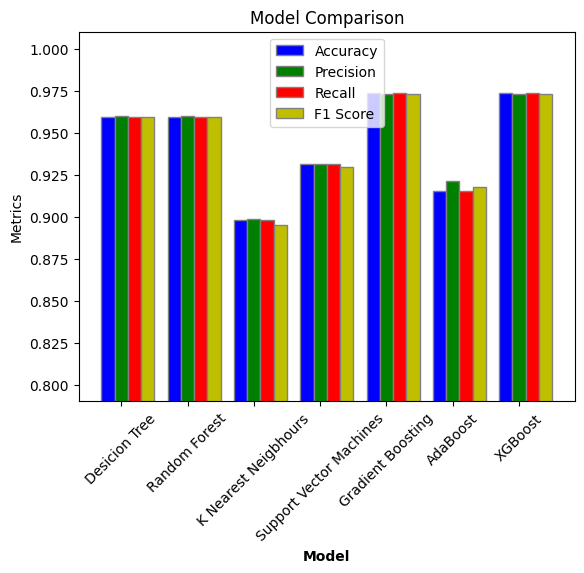

In [59]:
#ploting all the models Evaluation metrics

# Number of models
n_models = len(Model_compare['Models'])

# Setting the positions and width for the bars
bar_width = 0.2
r1 = np.arange(n_models)
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]

# Plotting the bars
plt.bar(r1, Model_compare['Accuracy'], color='b', width=bar_width, edgecolor='grey', label='Accuracy')
plt.bar(r2, Model_compare['Precision'], color='g', width=bar_width, edgecolor='grey', label='Precision')
plt.bar(r3, Model_compare['Recall'], color='r', width=bar_width, edgecolor='grey', label='Recall')
plt.bar(r4, Model_compare['F1_score'], color = 'y', width=bar_width, edgecolor = 'grey', label = 'F1 Score')

# Adding the xticks
plt.xlabel('Model', fontweight='bold')
plt.xticks([r + bar_width for r in range(n_models)], Model_compare['Models'])

# Adding labels and title
plt.ylabel('Metrics')
plt.title('Model Comparison')
plt.legend()
plt.xticks(rotation=45)

# Set y-axis limits
plt.ylim(0.79, 1.01)

# Show the plot
plt.show()

In [60]:
from joblib import dump
dump(model_xgb, 'XGBoost.joblib')

['XGBoost.joblib']